# Lightning with fastai

> Incrementally adding fastai goodness to your Lightning training

We're going to use the MNIST training code from Lightning's 'Quick Start' (as at August 2020), converted to a module.

:::{.callout-note}

The source script for `migrating_lightning` is in the `examples` subdirectory of this folder if you checked out the `fastai` repo from git, or can be downloaded from [here](https://github.com/fastai/fastai/blob/master/nbs/examples/migrating_lightning.py) if you're using an online viewer such as Colab.

:::

In [ ]:
from migrating_lightning import *

from fastai.vision.all import *

## Using fastai's training loop

We can use the Lightning module directly:

In [ ]:
model = LitModel()

To use it in fastai, we first pull the DataLoaders from the module into a `DataLoaders` object:

In [ ]:
data = DataLoaders(model.train_dataloader(), model.val_dataloader()).cuda()

We can now create a `Learner` and fit:

In [ ]:
learn = Learner(data, model, loss_func=F.cross_entropy, opt_func=Adam, metrics=accuracy)
learn.fit_one_cycle(1, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.367197,0.333293,0.910800,00:11


As you can see, migrating from Lightning allowed us to reduce the amount of code, and doesn't require you to change any of your existing data pipelines, optimizers, loss functions, models, etc. Once you've made this change, you can then benefit from fastai's rich set of callbacks, transforms, visualizations, and so forth.

For instance, in the Lightning example, Tensorboard support was defined a special-case "logger". In fastai, Tensorboard is just another `Callback` that you can add, with the parameter `cbs=Tensorboard`, when you create your `Learner`. The callbacks all work together, so you can add an remove any schedulers, loggers, visualizers, and so forth. You don't have to learn about special types of functionality for each - they are all just plain callbacks.

Note that fastai is very different from Lightning, in that it is much more than just a training loop (although we're only using the training loop in this example) - it is a complete framework including GPU-accelerated transformations, end-to-end inference, integrated applications for vision, text, tabular, and collaborative filtering, and so forth. You can use any part of the framework on its own, or combine them together, as described in the [fastai paper](https://arxiv.org/abs/2002.04688).

### Taking advantage of fastai Data Blocks

One problem in the Lightning example is that it doesn't actually use a validation set - it's just using the training set a second time as a validation set.

You might prefer to use fastai's Data Block API, which makes it really easy to create, visualize, and test your input data processing. Here's how you can create input data for MNIST, for instance:

In [ ]:
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

Here, we're telling `DataBlock` that we have a B&W image input, and a category output, our input items are file names of images, the images are labeled based on the name of the parent folder, and they are split by training vs validation based on the grandparent folder name. It's important to actually look at your data, so fastai also makes it easy to visualize your inputs and outputs, for instance:

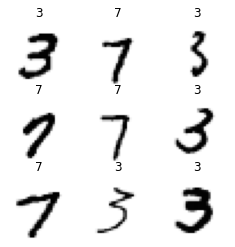

In [ ]:
dls = mnist.dataloaders(untar_data(URLs.MNIST_TINY))
dls.show_batch(max_n=9, figsize=(4,4))